In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

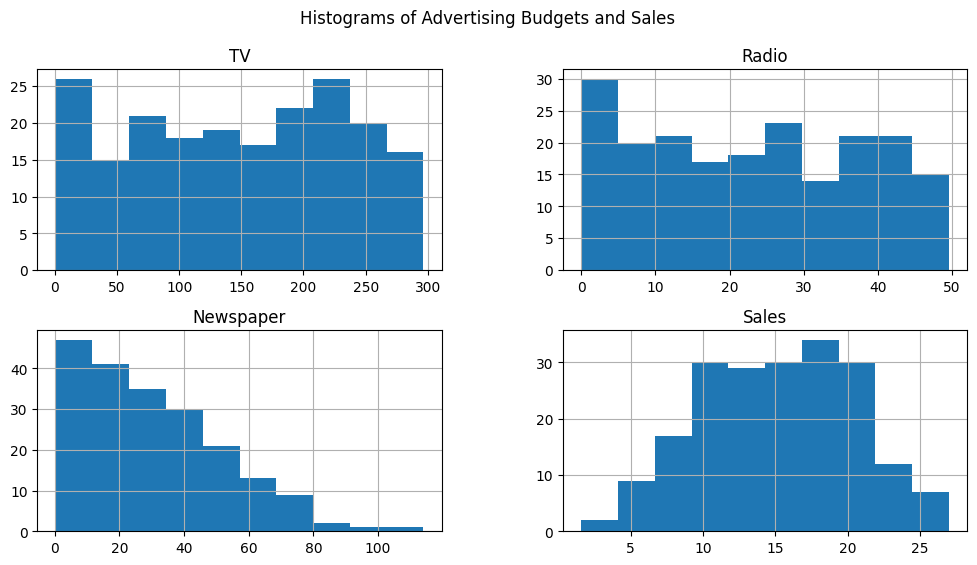

In [17]:
df.hist(bins=10, figsize=(12, 6))
plt.suptitle("Histograms of Advertising Budgets and Sales")
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib

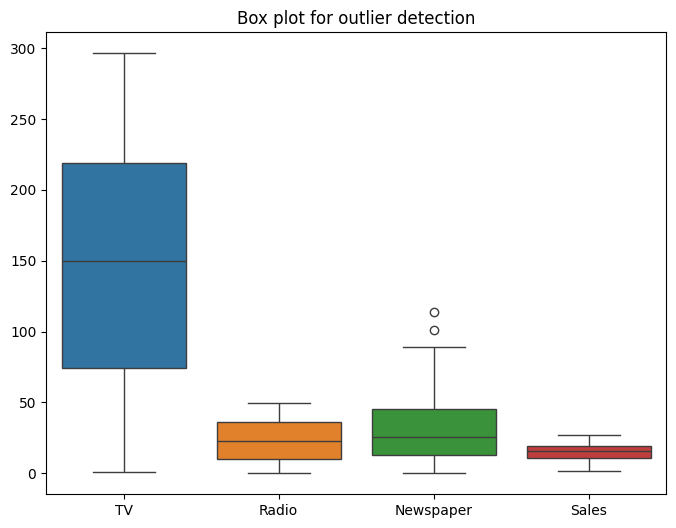

In [26]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df)
plt.title("Box plot for outlier detection")
plt.show()

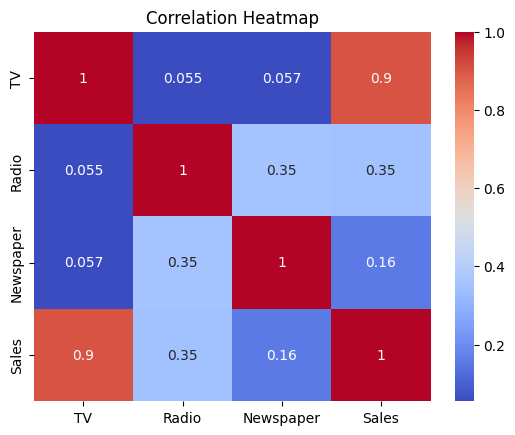

In [29]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

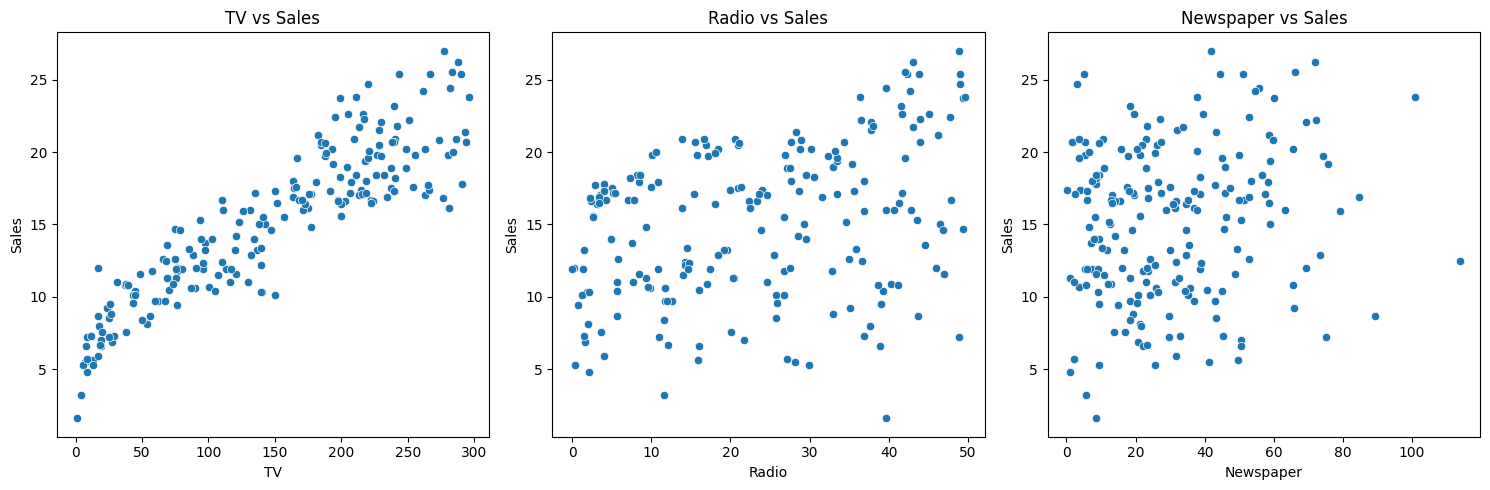

In [35]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title("TV vs Sales")

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title("Radio vs Sales")

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title("Newspaper vs Sales")

plt.tight_layout()
plt.show()

## Scaling the data

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper']])
df_scaled = pd.DataFrame(scaled_features, columns=['TV', 'Radio', 'Newspaper'])
df_scaled['Sales'] = df['Sales']

print(data_scaled.head())


         TV     Radio  Newspaper  Sales
0  0.969852  0.981522   1.778945   22.1
1 -1.197376  1.082808   0.669579   10.4
2 -1.516155  1.528463   1.783549   12.0
3  0.052050  1.217855   1.286405   16.5
4  0.394182 -0.841614   1.281802   17.9


In [43]:
df_scaled.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,12.0
3,0.052050,1.217855,1.286405,16.5
4,0.394182,-0.841614,1.281802,17.9


## Model Building

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

Mean Squared Error : 2.9077569102710914
Mean Absolute Error : 1.2748262109549344
R-Squared Score : 0.9059011844150826


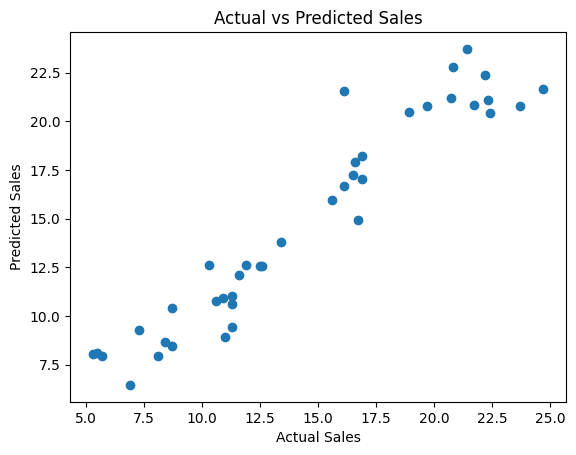

In [54]:
#LinearRregression
from sklearn.linear_model import LinearRegression
x = df_scaled[['TV','Radio','Newspaper']]
y = df_scaled['Sales']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"R-Squared Score : {r2}")

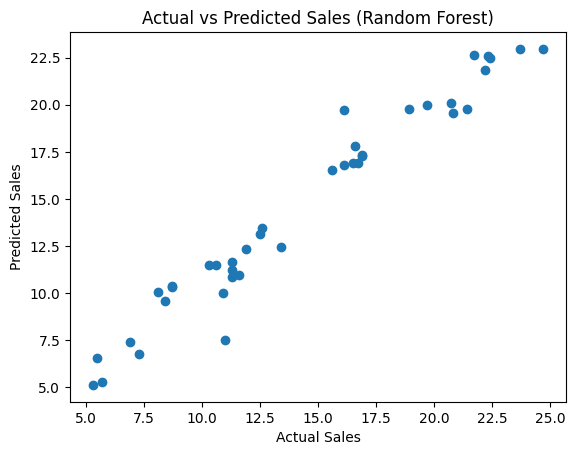

Mean Squared Error : 1.436150725000001
Mean Absolute Error : 0.9162249999999993
R-Squared Score : 0.9535242847342004


In [55]:
from sklearn.ensemble import RandomForestRegressor

x = df_scaled[['TV', 'Radio', 'Newspaper']]
y = df_scaled['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.show()

print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"R-Squared Score : {r2}")


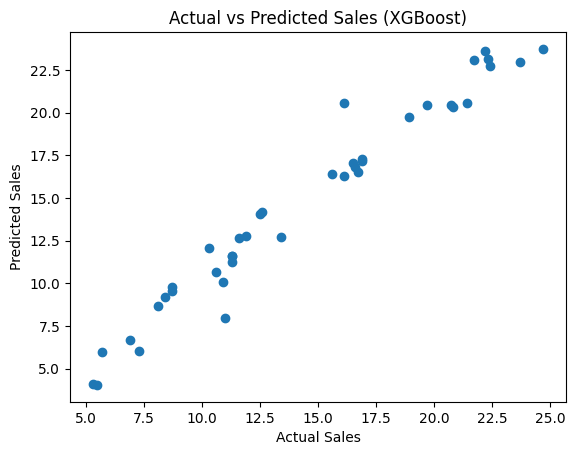

Mean Squared Error : 1.4514290545159532
Mean Absolute Error : 0.889899742603302
R-Squared Score : 0.953029858014247


In [56]:
import xgboost as xgb

x = df_scaled[['TV', 'Radio', 'Newspaper']]
y = df_scaled['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (XGBoost)")
plt.show()

print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"R-Squared Score : {r2}")


## Predict your data

In [65]:
def predict_sales(df, new_data):
    x = df[['TV', 'Radio', 'Newspaper']]
    y = df['Sales']

    # Step 2: Scale the features
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    rf = RandomForestRegressor(random_state=42)
    rf.fit(x_scaled, y)

    new_data_scaled = scaler.transform(new_data)
    predicted_sales = rf.predict(new_data_scaled)
    return predicted_sales

new_data = pd.DataFrame([[150, 25, 30]], columns=['TV', 'Radio', 'Newspaper'])
predicted_sales = predict_sales(df_scaled, new_data)
print(f"Predicted Sales: {predicted_sales}")


Predicted Sales: [26.12]


In [66]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)